In [154]:
#Let's define the essential libraries required.
import numpy as np                                   #for array
import pandas as pd                                  #for dataframe
import matplotlib.pyplot as plt                      #for visualization
%matplotlib inline
import seaborn as sns                                #for visualization
import warnings ; warnings.filterwarnings('ignore')  #for warnings->codes run smoother
print("######################################")
print("       Imported Key Packages            ")
print("######################################")


######################################
       Imported Key Packages            
######################################


# Get the Data

In [155]:
payment_df=pd.read_csv('/content/drive/MyDrive/imarticus/EDA IM/default_on_payment.csv')

**The problem statement** is to predict the people who are going to default on payment.

In [4]:
df=payment_df.copy() #lets make copy of our dataset 

In [5]:
df.sample(10) #lets cheak sample of dataset for better understanding

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
4812,104813,A11,36,A34,A41,9629,A61,A74,4,A93,A101,4,A123,24,A143,A152,2,A173,1,A192,A201,1,1
4387,104388,A12,18,A34,A42,7374,A61,A71,4,A93,A101,4,A122,40,A142,A152,2,A174,1,A192,A201,0,1
663,100664,A12,6,A33,A42,1050,A61,A71,4,A93,A101,1,A122,35,A142,A152,2,A174,1,A192,A201,0,1
983,100984,A11,36,A32,A41,8229,A61,A73,2,A93,A101,2,A122,26,A143,A152,1,A173,2,A191,A201,1,1
433,100434,A14,24,A34,A45,2058,A61,A73,4,A91,A101,2,A121,33,A143,A152,2,A173,1,A192,A201,0,1
2153,102154,A12,24,A34,A41,7758,A64,A75,2,A92,A101,4,A124,29,A143,A151,1,A173,1,A191,A201,0,1
695,100696,A14,6,A32,A41,1236,A63,A73,2,A93,A101,4,A122,50,A143,A151,1,A173,1,A191,A201,0,1
4045,104046,A14,11,A34,A40,1393,A61,A72,4,A92,A101,4,A123,35,A143,A152,2,A174,1,A191,A201,0,1
2650,102651,A11,48,A32,A46,7476,A61,A74,4,A93,A101,1,A124,50,A143,A153,1,A174,1,A192,A201,0,1
65,100066,A14,27,A32,A45,5190,A65,A75,4,A93,A101,4,A122,48,A143,A152,4,A173,2,A192,A201,0,1


In [6]:
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1,1


In [7]:
df.tail()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
4995,104996,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,0,1
4996,104997,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,0,1
4997,104998,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,0,1
4998,104999,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,1,1
4999,105000,A12,45,A34,A41,4576,A62,A71,3,A93,A101,4,A123,27,A143,A152,1,A173,1,A191,A201,0,1


In [8]:
df.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

In [9]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs       

In [10]:
#lets take closer look at the data
print("Dataset Dimensions:- " ,df.shape)
print("*************************")
print("Dataset Column List:- " ,df.columns.tolist())
print("*************************")
print("Dataset Data Types:- " ,df.dtypes)

Dataset Dimensions:-  (5000, 23)
*************************
Dataset Column List:-  ['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months', 'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income', 'Marital_Status_Gender', 'Other_Debtors_Guarantors', 'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ', 'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker', 'Default_On_Payment', 'Count']
*************************
Dataset Data Types:-  Customer_ID                     int64
Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property 

In [11]:
df.head(2)

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0,1


In [12]:
df.describe().T
#As we  view central tendency, mean, median, standard deviation
# percentile & many other things to give you the idea about the data .

,count,mean,std,min,25%,50%,75%,max
Customer_ID,5000.0,102500.500,1443.520003,100001.0,101250.75,102500.5,103750.25,105000.0
Duration_in_Months,5000.0,20.903,12.053989,4.0,12.00,18.0,24.00,72.0
Credit_Amount,5000.0,3271.258,2821.607329,250.0,1365.50,2319.5,3972.25,18424.0
Inst_Rt_Income,5000.0,2.973,1.118267,1.0,2.00,3.0,4.00,4.0
Current_Address_Yrs,5000.0,2.845,1.103276,1.0,2.00,3.0,4.00,4.0
Age,5000.0,35.546,11.370917,19.0,27.00,33.0,42.00,75.0
Num_CC,5000.0,1.407,0.577423,1.0,1.00,1.0,2.00,4.0
Dependents,5000.0,1.155,0.361941,1.0,1.00,1.0,1.00,2.0
Default_On_Payment,5000.0,0.299,0.457866,0.0,0.00,0.0,1.00,1.0
Count,5000.0,1.000,0.000000,1.0,1.00,1.0,1.00,1.0


In [14]:
#lets cheak there a NULL VALUES in the dataset
df.isnull().sum()
#no Null Values in Dataset

Customer_ID                    0
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
Count                          0
dtype: int64

In [15]:
#misssing values in percentage for those columns that have missing values
missing_p=df[df.columns[df.isnull().any()]].isnull().sum()*100 / len(df)
missing_p

Series([], dtype: float64)

In [16]:
df.head(2)

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0,1


# Model Building

In [17]:
# defining X and Y variable

x = df.drop(['Customer_ID','Default_On_Payment'], axis=1)
y= df[['Default_On_Payment']]

In [18]:
print(x.shape)
print(y.shape)

(5000, 21)
(5000, 1)


In [23]:
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1,1


In [25]:
cat_feature=[i for i in df.columns if df.dtypes[i]=='object'] #we will find out the cat features
cat_feature

['Status_Checking_Acc',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Property',
 'Other_Inst_Plans ',
 'Housing',
 'Job',
 'Telephone',
 'Foreign_Worker']

In [ ]:
x= pd.get_dummies(x,columns = ['Status_Checking_Acc','Credit_History','Purposre_Credit_Taken',
                                   'Savings_Acc','Years_At_Present_Employment','Marital_Status_Gender',
                                    'Other_Debtors_Guarantors','Property','Other_Inst_Plans ','Housing',
                                     'Job','Telephone','Foreign_Worker'],drop_first = True) 

In [33]:
x

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Count,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A410,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A46,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Years_At_Present_Employment_A72,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Other_Debtors_Guarantors_A102,Other_Debtors_Guarantors_A103,Property_A122,Property_A123,Property_A124,Other_Inst_Plans _A142,Other_Inst_Plans _A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_Worker_A202
0,6,1169,4,4,67,2,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,1736,3,4,31,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
4996,30,3857,4,4,40,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0
4997,12,804,4,4,38,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
4998,45,1845,4,4,23,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [36]:
# split the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=50)

In [37]:
# lets check the first 5 rows of the x_train 
x_train.head()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Count,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A410,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A46,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Years_At_Present_Employment_A72,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Other_Debtors_Guarantors_A102,Other_Debtors_Guarantors_A103,Property_A122,Property_A123,Property_A124,Other_Inst_Plans _A142,Other_Inst_Plans _A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_Worker_A202
1309,9,276,4,4,22,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1702,24,1377,4,2,47,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3982,21,2923,1,1,28,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
652,24,2303,4,1,45,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
3114,12,1680,3,1,35,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0


In [38]:
# lets check the first 5 rows of the x_test
x_test.head()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Count,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A410,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A46,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Years_At_Present_Employment_A72,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Other_Debtors_Guarantors_A102,Other_Debtors_Guarantors_A103,Property_A122,Property_A123,Property_A124,Other_Inst_Plans _A142,Other_Inst_Plans _A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_Worker_A202
3431,24,11328,2,3,29,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
2042,18,6204,2,4,44,1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0
79,30,3832,2,1,22,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0
4663,6,1050,4,1,35,2,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
3640,18,750,4,1,27,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [39]:
# lets check the first 5 rows of the y_train 
y_train.head()

,Default_On_Payment
1309,0
1702,0
3982,0
652,1
3114,0


In [40]:
# lets check the first 5 rows of the y_test
y_test.head()

,Default_On_Payment
3431,1
2042,0
79,0
4663,0
3640,1


In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,precision_score,
                             roc_auc_score, roc_curve, recall_score, precision_recall_curve, f1_score)

In [44]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [45]:
logreg = LogisticRegression()

In [46]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [47]:
# Predicting on the train set with default cutoff value to be 0.5
pred_train = logreg.predict(x_train)

In [49]:
cm= confusion_matrix(y_train,pred_train,labels=[1,0])    #[1,0   #[TP, FN]
                                                         # 0,1]  #[FP, TN]
cm

array([[ 528,  541],
       [ 321, 2110]])

In [50]:
recall_score(y_train,pred_train)

0.4939195509822264

In [51]:
precision_score(y_train,pred_train)

0.6219081272084805

In [52]:
accuracy_score(y_train,pred_train)

0.7537142857142857

In [53]:
f1_score(y_train,pred_train)

0.5505735140771636

In [54]:
pred_test = logreg.predict(x_test)

In [55]:
cm= confusion_matrix(y_test,pred_test,labels=[1,0]) 
cm

array([[202, 224],
       [169, 905]])

In [56]:
recall_score(y_test,pred_test)

0.47417840375586856

In [57]:
precision_score(y_test,pred_test)

0.5444743935309974

In [58]:
accuracy_score(y_test,pred_test)

0.738

In [141]:
f1_score(y_test,pred_test)

0.506900878293601

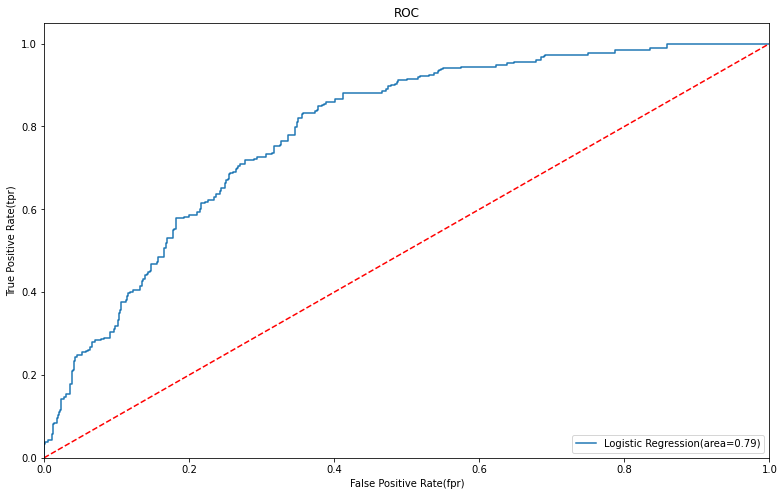

In [59]:
# Lets plot the ROC-AUC curve and see the results
logit_roc_auc= roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])
fpr,tpr, thresholds = roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate(fpr)')
plt.ylabel('True Positive Rate(tpr)')
plt.title('ROC')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [60]:
# Let us find out an Optimal cutoff
train_pred_prob=logreg.predict_proba(x_train)[:,1]

train_pred_prob

array([0.50181983, 0.34230636, 0.47670086, ..., 0.23107913, 0.5835927 ,
       0.39298851])

In [62]:
column_names = ['Cutoff_Prob', 'TP', 'FN', 'TN', 'FP', 'P', 'N']

cutoff_data = pd.DataFrame(columns = column_names)
cutoff_Prob = np.arange(0, 1.01, 0.01)

for cutoff in cutoff_Prob:
    y_train['pred_y'] = (train_pred_prob > cutoff).astype('int64')
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 0)).sum()
    P = TP+FN
    N = TN+FP
   
    temp_data = {"Cutoff_Prob": cutoff,
                 "TP": TP,
                 "FN": FN,
                 "TN": TN,
                 "FP": FP,
                 "P": P,
                 "N": N}
   
    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)
   
#Dropping the pred_y column from y_train data
y_train.drop("pred_y", axis=1, inplace=True)  

In [63]:
cutoff_data['Accuracy']= (cutoff_data['TP']+cutoff_data['TN'])/(cutoff_data['P']+cutoff_data['N'])
cutoff_data['Sensitivity']=cutoff_data['TP']/cutoff_data['P']
cutoff_data['Specificity']=cutoff_data['TN']/cutoff_data['N']
cutoff_data['Precision']=cutoff_data['TP']/(cutoff_data['TP']+cutoff_data['FP'])
cutoff_data['Recall']= cutoff_data['TP']/cutoff_data['P']
cutoff_data['f1_score']=2*((cutoff_data['Recall']*cutoff_data['Precision'])/(cutoff_data['Recall']+cutoff_data['Precision']))
cutoff_data['Distance']=np.sqrt((1-cutoff_data['Sensitivity']**2)+(1-cutoff_data['Specificity']**2))
cutoff_data['TPR']= cutoff_data['TP']/cutoff_data['P']
cutoff_data['FPR']=1-cutoff_data['Specificity']
cutoff_data['KS']= cutoff_data['TPR']-cutoff_data['FPR']

In [64]:
cutoff_data.head()

,Cutoff_Prob,TP,FN,TN,FP,P,N,Accuracy,Sensitivity,Specificity,Precision,Recall,f1_score,Distance,TPR,FPR,KS
0,0.00,1069.0,0.0,0.0,2431.0,1069.0,2431.0,0.305429,1.000000,0.000000,0.305429,1.000000,0.467936,1.000000,1.000000,1.000000,0.000000
1,0.01,1069.0,0.0,12.0,2419.0,1069.0,2431.0,0.308857,1.000000,0.004936,0.306479,1.000000,0.469168,0.999988,1.000000,0.995064,0.004936
2,0.02,1069.0,0.0,83.0,2348.0,1069.0,2431.0,0.329143,1.000000,0.034142,0.312848,1.000000,0.476594,0.999417,1.000000,0.965858,0.034142
3,0.03,1069.0,0.0,199.0,2232.0,1069.0,2431.0,0.362286,1.000000,0.081859,0.323841,1.000000,0.489245,0.996644,1.000000,0.918141,0.081859
4,0.04,1064.0,5.0,348.0,2083.0,1069.0,2431.0,0.403429,0.995323,0.143151,0.338100,0.995323,0.504744,0.994405,0.995323,0.856849,0.138474


In [65]:
print(np.argmin(cutoff_data['Distance']))
print(np.argmax(cutoff_data['f1_score']))
print(np.argmax(cutoff_data['KS']))

25
25
25


In [66]:
Dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data['Distance']),'Cutoff_Prob']
F1_score =  cutoff_data.loc[np.argmax(cutoff_data['f1_score']),'Cutoff_Prob']
KS_Score = cutoff_data.loc[np.argmax(cutoff_data['KS']),'Cutoff_Prob']

In [72]:
cutoffs=[Dist_cutoff,F1_score,KS_Score]

for cutoff in cutoffs:
    y_train_pred=(logreg.predict_proba(x_train)[:,1]>cutoff).astype("int64")
    y_test_pred=(logreg.predict_proba(x_test)[:,1]>cutoff).astype("int64")
    
    print('cutoff ->',cutoff)
    print('accuracy train ->',accuracy_score(y_train,y_train_pred))
    print('recall train ->',recall_score(y_train,y_train_pred))
    print('precision train ->',precision_score(y_train,y_train_pred))
    print('F1 Score train ->',f1_score(y_train,y_train_pred))
    print('accuracy test ->',accuracy_score(y_test,y_test_pred))
    print('recall test ->',recall_score(y_test,y_test_pred))
    print('precision test ->',precision_score(y_test,y_test_pred))
    print('F1 score test ->',f1_score(y_test,y_test_pred))
    print('      #*********************#')

cutoff -> 0.25
accuracy train -> 0.7162857142857143
recall train -> 0.8484565014031805
precision train -> 0.5218642117376294
F1 Score train -> 0.6462415390096188
accuracy test -> 0.6853333333333333
recall test -> 0.8403755868544601
precision test -> 0.46981627296587924
F1 score test -> 0.6026936026936027
      #*********************#
cutoff -> 0.25
accuracy train -> 0.7162857142857143
recall train -> 0.8484565014031805
precision train -> 0.5218642117376294
F1 Score train -> 0.6462415390096188
accuracy test -> 0.6853333333333333
recall test -> 0.8403755868544601
precision test -> 0.46981627296587924
F1 score test -> 0.6026936026936027
      #*********************#
cutoff -> 0.25
accuracy train -> 0.7162857142857143
recall train -> 0.8484565014031805
precision train -> 0.5218642117376294
F1 Score train -> 0.6462415390096188
accuracy test -> 0.6853333333333333
recall test -> 0.8403755868544601
precision test -> 0.46981627296587924
F1 score test -> 0.6026936026936027
      #***************

In [74]:
#now we will do Statsmodel
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)#split data in train and test

In [75]:
logit = sm.Logit(Y_train,X_train)
lgf = logit.fit()

Optimization terminated successfully.
         Current function value: 0.443767
         Iterations 7


In [76]:
print(lgf.summary())

                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3451
Method:                           MLE   Df Model:                           48
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:                  0.2688
Time:                        09:50:49   Log-Likelihood:                -1553.2
converged:                       True   LL-Null:                       -2124.3
Covariance Type:            nonrobust   LLR p-value:                9.554e-208
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Duration_in_Months                  0.0304      0.005      6.013      0.000       0.021       0.040
Credit_Amount                       0.0001   2.42e-05      4.702    

In [77]:
# To check Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1=pd.Series([variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])],index=X_train.columns)
print('series before feature selection: \n\n{}\n'.format(vif_series1))

series before feature selection: 

Duration_in_Months                   2.061914
Credit_Amount                        2.557865
Inst_Rt_Income                       1.408089
Current_Address_Yrs                  1.344801
Age                                  1.473604
Num_CC                               1.669940
Dependents                           1.191749
Count                              189.085653
Status_Checking_Acc_A12              1.677949
Status_Checking_Acc_A13              1.250395
Status_Checking_Acc_A14              1.805827
Credit_History_A31                   2.465564
Credit_History_A32                   8.434855
Credit_History_A33                   3.258645
Credit_History_A34                   7.161927
Purposre_Credit_Taken_A41            1.473842
Purposre_Credit_Taken_A410           1.175256
Purposre_Credit_Taken_A42            1.626521
Purposre_Credit_Taken_A43            1.768190
Purposre_Credit_Taken_A44            1.089229
Purposre_Credit_Taken_A45            1.106835

In [78]:
# Creating formula for removing columns which has VIF value > 5

def calculate_vif_(X,thresh=5.0):
    variables=list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif=[variance_inflation_factor(X.iloc[:, variables].values, ix)
             for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('Dropping \''+ X.iloc[:,variables].columns[maxloc]+
                 '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
            
            
    print("Remaining variables:")
    print(X.columns[variables])
    return X.iloc[:, variables]

In [79]:
X_train1=calculate_vif_(X_train)

Dropping 'Count' at index: 7
Dropping 'Job_A173' at index: 44
Dropping 'Age' at index: 4
Dropping 'Credit_History_A32' at index: 10
Dropping 'Dependents' at index: 5
Dropping 'Inst_Rt_Income' at index: 2
Dropping 'Marital_Status_Gender_A93' at index: 28
Dropping 'Num_CC' at index: 3
Dropping 'Current_Address_Yrs' at index: 2
Dropping 'Duration_in_Months' at index: 0
Dropping 'Other_Inst_Plans _A143' at index: 32
Remaining variables:
Index(['Credit_Amount', 'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13',
       'Status_Checking_Acc_A14', 'Credit_History_A31', 'Credit_History_A33',
       'Credit_History_A34', 'Purposre_Credit_Taken_A41',
       'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42',
       'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44',
       'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46',
       'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49',
       'Savings_Acc_A62', 'Savings_Acc_A63', 'Savings_Acc_A64',
       'Savings_Acc_A65'

In [80]:
# Check if all the columns having VIF > 5 are dropped

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1=pd.Series([variance_inflation_factor(X_train1.values,i)for i in range(X_train1.shape[1])],index=X_train1.columns)
print('series before feature selection: \n\n{}\n'.format(vif_series1))

series before feature selection: 

Credit_Amount                      3.252258
Status_Checking_Acc_A12            2.169056
Status_Checking_Acc_A13            1.272946
Status_Checking_Acc_A14            2.867840
Credit_History_A31                 1.139841
Credit_History_A33                 1.244281
Credit_History_A34                 1.622161
Purposre_Credit_Taken_A41          1.595243
Purposre_Credit_Taken_A410         1.164992
Purposre_Credit_Taken_A42          1.786336
Purposre_Credit_Taken_A43          2.283551
Purposre_Credit_Taken_A44          1.083752
Purposre_Credit_Taken_A45          1.095410
Purposre_Credit_Taken_A46          1.237616
Purposre_Credit_Taken_A48          1.072389
Purposre_Credit_Taken_A49          1.494355
Savings_Acc_A62                    1.264354
Savings_Acc_A63                    1.183646
Savings_Acc_A64                    1.142375
Savings_Acc_A65                    1.447651
Years_At_Present_Employment_A72    2.748964
Years_At_Present_Employment_A73    4.2658

# Significance test  

In [ ]:
# Significance test  

# H0 = X and Y are Insignificant
# H1 = X and Y are Significant

In [83]:
logit = sm.Logit(Y_train, X_train.astype('float'))
lgf = logit.fit()
print(lgf.summary())

Optimization terminated successfully.
         Current function value: 0.443767
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3451
Method:                           MLE   Df Model:                           48
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:                  0.2688
Time:                        10:17:54   Log-Likelihood:                -1553.2
converged:                       True   LL-Null:                       -2124.3
Covariance Type:            nonrobust   LLR p-value:                9.554e-208
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Duration_in_Months                  0.0304      0.005      6.013  

In [84]:
# Drop all the columns which has p- value > 0.05

cols=X_train1.columns.tolist()
# setting an initial max P-value
max_p_value =1
while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train1[cols]
    # fitting the model
    model = sm.Logit(Y_train,x_train_aux).fit()  
    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name of the variable with maximum p-value
    feature_with_p_max= p_values.idxmax()
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        
    else:
        break
        
        
selected_features = cols
print(selected_features)

Optimization terminated successfully.
         Current function value: 0.469215
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469215
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469950
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.470142
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.470355
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.470662
  

In [85]:
selected_features =['Credit_Amount', 'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13', 'Status_Checking_Acc_A14', 'Credit_History_A31', 'Credit_History_A34', 'Purposre_Credit_Taken_A41', 'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42', 'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A46', 'Purposre_Credit_Taken_A48', 'Savings_Acc_A64', 'Savings_Acc_A65', 'Years_At_Present_Employment_A74', 'Marital_Status_Gender_A92', 'Marital_Status_Gender_A94', 'Other_Debtors_Guarantors_A102', 'Other_Debtors_Guarantors_A103', 'Property_A122', 'Property_A123', 'Property_A124', 'Other_Inst_Plans _A142', 'Housing_A152', 'Housing_A153', 'Telephone_A192', 'Foreign_Worker_A202']

In [89]:
x_train2 = X_train[selected_features]
x_test2 = X_test[selected_features]

In [91]:
logit = sm.Logit(Y_train, x_train2)
lgf = logit.fit()
print(lgf.summary())

Optimization terminated successfully.
         Current function value: 0.471660
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3473
Method:                           MLE   Df Model:                           26
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:                  0.2229
Time:                        10:21:43   Log-Likelihood:                -1650.8
converged:                       True   LL-Null:                       -2124.3
Covariance Type:            nonrobust   LLR p-value:                6.363e-183
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Credit_Amount                       0.0001   1.73e-05      8.517  

In [92]:
x_train2.shape

(3500, 27)

In [93]:
x_test2.shape

(1500, 27)

In [95]:
Y_train.shape

(3500, 1)

In [96]:
pred_train2 = lgf.predict(x_train2)
pred_train2 = np.round(pred_train)

In [97]:
pred_train2

array([1, 0, 0, ..., 0, 1, 0])

In [99]:
confusion_matrix(Y_train,pred_train2, labels=[1,0] )

array([[ 249,  785],
       [ 600, 1866]])

In [100]:
recall_score(Y_train, pred_train2)

0.24081237911025144

In [101]:
precision_score(Y_train, pred_train2)

0.29328621908127206

In [102]:
accuracy_score(Y_train, pred_train2)

0.6042857142857143

In [103]:
f1_score(Y_train, pred_train2)

0.2644715878916622

In [104]:
pred_test2 = lgf.predict(x_test2.astype('float'))
pred_test2 = np.round(pred_test2)          # Round  for cutoff 0.5

In [106]:
confusion_matrix(Y_test,pred_test2, labels=[1,0] )

array([[206, 255],
       [116, 923]])

In [107]:
recall_score(Y_test, pred_test2)

0.44685466377440347

In [108]:
precision_score(Y_test, pred_test2)

0.639751552795031

In [109]:
accuracy_score(Y_test, pred_test2)

0.7526666666666667

In [110]:
f1_score(Y_test, pred_test2)

0.5261813537675607

In [111]:
logit = sm.Logit(Y_train, x_train2)
lgf = logit.fit()



pred_train2 = lgf.predict(x_train2)
pred_train2 = np.round(pred_train)

Optimization terminated successfully.
         Current function value: 0.471660
         Iterations 7


# ROC

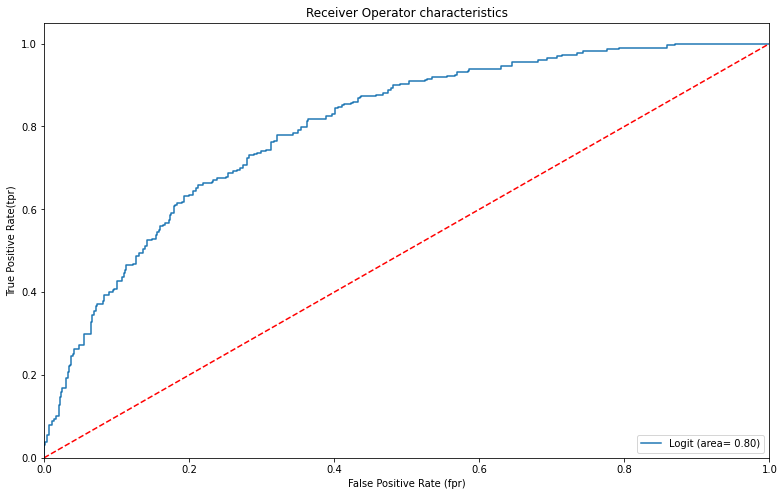

In [114]:
#lets build the ROC Curve
logit_roc_auc = roc_auc_score(Y_test, lgf.predict(x_test2.astype('float')))
fpr, tpr, thresholds = roc_curve(Y_test, lgf.predict(x_test2.astype('float')))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logit (area= %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate(tpr)')
plt.title('Receiver Operator characteristics')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

In [116]:
train_pred_prob1 = lgf.predict(x_train2)

train_pred_prob1

1840    0.446287
2115    0.020549
4437    0.022515
1146    0.534797
2486    0.102134
          ...   
4426    0.080794
466     0.572270
3092    0.037226
3772    0.027696
860     0.011284
Length: 3500, dtype: float64

In [120]:
#Let us now try to find out an optimal cut off
columns_names1 = ["Cutoff_Prob1", "TP1","FN1", "TN1","FP1", "P1","N1"]

cutoff_data1 = pd.DataFrame(columns=columns_names1)
cutoff_prob1 = np.arange(0, 1.01, 0.01)

for cutoff1 in cutoff_prob1:
  Y_train["pred_y1"]=(train_pred_prob1 > cutoff1).astype("int64")
  TP1 = np.logical_and((Y_train.pred_y1 == 1), (Y_train.Default_On_Payment == 1)).sum()
  FN1 = np.logical_and((Y_train.pred_y1 == 0), (Y_train.Default_On_Payment== 1)).sum()
  TN1 = np.logical_and((Y_train.pred_y1 == 0), (Y_train.Default_On_Payment== 0)).sum()
  FP1 = np.logical_and((Y_train.pred_y1 == 1), (Y_train.Default_On_Payment == 0)).sum()
  P1 = TP1 + FN1
  N1 = TN1 + FP1

  temp_data1 = {"Cutoff_Prob1": cutoff1,
               "TP1": TP1,
               "FN1": FN1,
               "TN1": TN1,
               "FP1": FP1, 
               "P1": P1,
               "N1": N1 }

  cutoff_data1 = cutoff_data1.append(temp_data1, ignore_index=True)

# Dropping the pred_y1 column from y_train data
Y_train.drop("pred_y1", axis = 1, inplace =True) 

In [121]:
cutoff_data1

,Cutoff_Prob1,TP1,FN1,TN1,FP1,P1,N1
0,0.00,1034.0,0.0,0.0,2466.0,1034.0,2466.0
1,0.01,1034.0,0.0,15.0,2451.0,1034.0,2466.0
2,0.02,1034.0,0.0,73.0,2393.0,1034.0,2466.0
3,0.03,1034.0,0.0,191.0,2275.0,1034.0,2466.0
4,0.04,1029.0,5.0,288.0,2178.0,1034.0,2466.0
...,...,...,...,...,...,...,...
96,0.96,0.0,1034.0,2466.0,0.0,1034.0,2466.0
97,0.97,0.0,1034.0,2466.0,0.0,1034.0,2466.0
98,0.98,0.0,1034.0,2466.0,0.0,1034.0,2466.0
99,0.99,0.0,1034.0,2466.0,0.0,1034.0,2466.0


In [122]:
# Sensitivity(Sn1) 
Sn1 = cutoff_data1['TP1']/cutoff_data1['P1']
Sn1

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      0.995164
         ...   
96     0.000000
97     0.000000
98     0.000000
99     0.000000
100    0.000000
Length: 101, dtype: float64

In [123]:
#Recall(Re1)
Re1 = cutoff_data1['TP1']/cutoff_data1['P1']
Re1

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      0.995164
         ...   
96     0.000000
97     0.000000
98     0.000000
99     0.000000
100    0.000000
Length: 101, dtype: float64

In [124]:
# Specificity(Sp1)
Sp1 = cutoff_data1['TN1']/cutoff_data1['N1']
Sp1

0      0.000000
1      0.006083
2      0.029603
3      0.077453
4      0.116788
         ...   
96     1.000000
97     1.000000
98     1.000000
99     1.000000
100    1.000000
Length: 101, dtype: float64

In [125]:
#Precision (Pr1)
Pr1 = cutoff_data1['TP1']/(cutoff_data1['TP1'] + (cutoff_data1['FP1']))
Pr1

0      0.295429
1      0.296700
2      0.301722
3      0.312481
4      0.320861
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Length: 101, dtype: float64

In [126]:
# F1 score
F1_score1 = 2*((Re1 * Pr1)/(Re1 + Pr1))
F1_score1

0      0.456109
1      0.457623
2      0.463573
3      0.476169
4      0.485263
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Length: 101, dtype: float64

In [127]:
# True Positive Rate (tpr1)
tpr1 = Sn1
tpr1

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      0.995164
         ...   
96     0.000000
97     0.000000
98     0.000000
99     0.000000
100    0.000000
Length: 101, dtype: float64

In [128]:
# Flase Positive Rate (fpr1)
fpr1 = 1 - Sp1
fpr1

0      1.000000
1      0.993917
2      0.970397
3      0.922547
4      0.883212
         ...   
96     0.000000
97     0.000000
98     0.000000
99     0.000000
100    0.000000
Length: 101, dtype: float64

In [129]:
# KS cutoff1= max ( tpr1 - fpr1)
ks_cutoff1 = tpr1-fpr1
ks_cutoff1

0      0.000000
1      0.006083
2      0.029603
3      0.077453
4      0.111953
         ...   
96     0.000000
97     0.000000
98     0.000000
99     0.000000
100    0.000000
Length: 101, dtype: float64

In [130]:
# Distance1 = sqrt((1-Sn)^2  +  (1-Sp)^2)
dist1 = ((1-Sn1)**2  +  (1-Sp1)**2)**(0.5)
dist1

0      1.000000
1      0.993917
2      0.970397
3      0.922547
4      0.883225
         ...   
96     1.000000
97     1.000000
98     1.000000
99     1.000000
100    1.000000
Length: 101, dtype: float64

In [131]:
# F1 cutoff = max ( F1_score1)
f1_cutoff1 = max(F1_score1)
f1_cutoff1

0.6298726360478579

In [132]:
#append all in cutoff Data1
cutoff_data1['Sn1'] = Sn1
cutoff_data1['Re1'] = Re1
cutoff_data1['Sp1'] = Sp1
cutoff_data1['tpr1'] = Re1
cutoff_data1['fpr1'] = fpr1
cutoff_data1['ks_cutoff1'] = ks_cutoff1
cutoff_data1['dist1'] = dist1
cutoff_data1['F1_score1'] = F1_score1

In [133]:
cutoff_data1

,Cutoff_Prob1,TP1,FN1,TN1,FP1,P1,N1,Sn1,Re1,Sp1,tpr1,fpr1,ks_cutoff1,dist1,F1_score1
0,0.00,1034.0,0.0,0.0,2466.0,1034.0,2466.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.456109
1,0.01,1034.0,0.0,15.0,2451.0,1034.0,2466.0,1.000000,1.000000,0.006083,1.000000,0.993917,0.006083,0.993917,0.457623
2,0.02,1034.0,0.0,73.0,2393.0,1034.0,2466.0,1.000000,1.000000,0.029603,1.000000,0.970397,0.029603,0.970397,0.463573
3,0.03,1034.0,0.0,191.0,2275.0,1034.0,2466.0,1.000000,1.000000,0.077453,1.000000,0.922547,0.077453,0.922547,0.476169
4,0.04,1029.0,5.0,288.0,2178.0,1034.0,2466.0,0.995164,0.995164,0.116788,0.995164,0.883212,0.111953,0.883225,0.485263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN
97,0.97,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN
98,0.98,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN
99,0.99,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [134]:
cutoff_data1.to_csv("cutoff_data.csv", index = False)

In [135]:
dist_cutoff1 = cutoff_data1.loc[np.argmin(cutoff_data1["dist1"]), "Cutoff_Prob1"]
ks_cutoff1 = cutoff_data1.loc[np.argmax(cutoff_data1["ks_cutoff1"]), "Cutoff_Prob1"]
f1_cutoff1 = cutoff_data1.loc[np.argmax(cutoff_data1["F1_score1"]), "Cutoff_Prob1"]

In [136]:
print("The distance cutoff determined is:", dist_cutoff1)
print("The KS cutoff determined is:", ks_cutoff1)
print("The f1 cutoff determined is:", f1_cutoff1)

The distance cutoff determined is: 0.28
The KS cutoff determined is: 0.28
The f1 cutoff determined is: 0.28


In [137]:
list1 = [dist_cutoff1, ks_cutoff1,f1_cutoff1 ]
list1

[0.28, 0.28, 0.28]

In [139]:
for cutoff1 in list1:
  y_train_pred1= (lgf.predict(x_train2) >cutoff1).astype("int64") 
  y_test_pred1 = (lgf.predict(x_test2.astype('float')) >cutoff1).astype("int64") 
  print(cutoff)
  print(f'accuracy_score for the train data is {accuracy_score(Y_train, y_train_pred1)}')
  print(f'accuracy_score for the test data is {accuracy_score(Y_test, y_test_pred1)}')
  print("********************")
  print(f'Precision_score  for the train data is {precision_score (Y_train, y_train_pred1)}')
  print(f'Precision_score  for the test data is {precision_score (Y_test, y_test_pred1)}')
  print("********************")
  print(f'recall_score  for the train data is {recall_score (Y_train, y_train_pred1)}')
  print(f'recall_score  for the test data is {recall_score (Y_test, y_test_pred1)}')
  print("********************")
  print(f'F1_score  for the train data is {f1_score (Y_train, y_train_pred1)}')
  print(f'F1_score  for the test data is {f1_score (Y_test, y_test_pred1)}')
  print("********************")

0.25
accuracy_score for the train data is 0.726
accuracy_score for the test data is 0.7026666666666667
********************
Precision_score  for the train data is 0.5240847784200385
Precision_score  for the test data is 0.5106685633001422
********************
recall_score  for the train data is 0.7891682785299806
recall_score  for the test data is 0.7787418655097614
********************
F1_score  for the train data is 0.6298726360478579
F1_score  for the test data is 0.6168384879725085
********************
0.25
accuracy_score for the train data is 0.726
accuracy_score for the test data is 0.7026666666666667
********************
Precision_score  for the train data is 0.5240847784200385
Precision_score  for the test data is 0.5106685633001422
********************
recall_score  for the train data is 0.7891682785299806
recall_score  for the test data is 0.7787418655097614
********************
F1_score  for the train data is 0.6298726360478579
F1_score  for the test data is 0.61683848797250

In [146]:
scores =({'Model' :['Sk-Learn Logestic Regression (default = 0.5)',
                    'Sk-Learn Logestic Regression (dist-cutoff)',
                    'Sk-Learn Logestic Regression (Ks-cutoff)',
                    'Sk-Learn Logestic Regression (F1-cutoff)',
                    'Statsmodel Logestic Regressioin (default = 0.5)',
                    'Statsmodel Logestic Regressioin (dist - cutoff)',
                    'Statsmodel Logestic Regressioin (Ks-cutoff)',
                    'Statsmodel Logestic Regressioin (F1-cutoff)'],
         'Train_Accuracy' : [0.75,0.71,0.71,0.71,0.60,0.72,0.72,0.72],
         'Test_Accuracy' : [0.73,0.68,0.68,0.68,0.75,0.70,0.70,0.70],
          'Train_Re' : [0.49,0.84,0.84,0.84,0.24,0.78,0.78,0.78],
          'Test_Re' : [0.47,0.84,0.84,0.84,0.44,0.77,0.77,0.77 ],
          'Train_Pr' : [0.62,0.52,0.52,0.52,0.29,0.52,0.52,0.52],
          'Test_Pr' : [0.54,0.46,0.46,0.46,0.63,0.51,0.51,0.51],
          'Train_F1' :[0.55,0.64, 0.64, 0.64,0.24 ,0.62,0.62,0.62],
          'Test_F1' :[0.50,0.60,0.60,0.60,0.52,0.61,0.61,0.61]})

In [147]:
comparision=pd.DataFrame(scores)


In [148]:
comparision

,Model,Train_Accuracy,Test_Accuracy,Train_Re,Test_Re,Train_Pr,Test_Pr,Train_F1,Test_F1
0,Sk-Learn Logestic Regression (default = 0.5),0.75,0.73,0.49,0.47,0.62,0.54,0.55,0.50
1,Sk-Learn Logestic Regression (dist-cutoff),0.71,0.68,0.84,0.84,0.52,0.46,0.64,0.60
2,Sk-Learn Logestic Regression (Ks-cutoff),0.71,0.68,0.84,0.84,0.52,0.46,0.64,0.60
3,Sk-Learn Logestic Regression (F1-cutoff),0.71,0.68,0.84,0.84,0.52,0.46,0.64,0.60
4,Statsmodel Logestic Regressioin (default = 0.5),0.60,0.75,0.24,0.44,0.29,0.63,0.24,0.52
5,Statsmodel Logestic Regressioin (dist - cutoff),0.72,0.70,0.78,0.77,0.52,0.51,0.62,0.61
6,Statsmodel Logestic Regressioin (Ks-cutoff),0.72,0.70,0.78,0.77,0.52,0.51,0.62,0.61
7,Statsmodel Logestic Regressioin (F1-cutoff),0.72,0.70,0.78,0.77,0.52,0.51,0.62,0.61


In [153]:
#odds=np.exp(b) The Percentage change in odds is given as odds =(exp(b)-1)*100
#converting coefficient to odds 
odds=np.exp(lgf.params)

#finding the percentage change 
perc_change_odds=(np.exp(lgf.params)-1)*100

#removing limit from number of columns to display
pd.set_option('display.max_columns',None)

#adding the odds to dataframe 
pd.DataFrame({'Odds':odds,'Change_odd%':perc_change_odds},index=x_train2.columns)

,Odds,Change_odd%
Credit_Amount,1.000147,0.014742
Status_Checking_Acc_A12,0.609940,-39.005989
Status_Checking_Acc_A13,0.323104,-67.689634
Status_Checking_Acc_A14,0.143224,-85.677558
Credit_History_A31,2.357039,135.703883
Credit_History_A34,0.582730,-41.726957
Purposre_Credit_Taken_A41,0.255707,-74.429285
Purposre_Credit_Taken_A410,0.270975,-72.902463
Purposre_Credit_Taken_A42,0.613543,-38.645713
Purposre_Credit_Taken_A43,0.612686,-38.731386


In [ ]:
#Coeffiecient Interpetations 

**Coeffiecient Interpetations**
 In the **Credit_History_A31** odds is 2.357039 **increases **by 135.70 % when other features are constant.
and in **Savings_Acc_A64** odds is 0.337321 and its **decreseses** by -66.26 when other features are constant